Trabalho Final - Análise de Dados com Python
Integrantes:

1) Felipe Lemos Scudeller - RM347942
2) Fábio Marcelo de Souza - RM347773


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings

warnings.simplefilter('ignore')


### 0- Lendo dataset ao script

In [23]:
link = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
data = pd.read_csv(link)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1- Lendo estatisticas basicas do dataset

In [24]:
#numero de colunas e linhas do dataset fornecido
print(f'Tamanho do dataset é de :',data.shape)
print('*'*40)
#lendo estaticicas do dataset
print(data.describe().T)

Tamanho do dataset é de : (20640, 10)
****************************************
                      count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.26

### 2- Verificando e lidando com a quantidade de zeros no dataset


In [25]:
#verificando a porcentagem de zero nas colunas
data.isnull().sum().sort_values(ascending=False)/data.shape[0]

total_bedrooms        0.010029
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [26]:
#substituindo zero por medianas
median = data.total_bedrooms.median()
data.total_bedrooms = data.total_bedrooms.fillna(median)
data.isnull().sum().sort_values(ascending=False)/data.shape[0]

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

### 3- Visualização de dados/Exploração da Base da variavel median_house_value


In [27]:
age_series , age_intervals = pd.cut(data['housing_median_age'],5,retbins=True)
print('Serie de housing_median_age :')
print(age_series.head())
print()
print("Intervalos de housing_median_age: ",age_intervals)

Serie de housing_median_age :
0    (31.6, 41.8]
1    (11.2, 21.4]
2    (41.8, 52.0]
3    (41.8, 52.0]
4    (41.8, 52.0]
Name: housing_median_age, dtype: category
Categories (5, interval[float64, right]): [(0.949, 11.2] < (11.2, 21.4] < (21.4, 31.6] < (31.6, 41.8] < (41.8, 52.0]]

Intervalos de housing_median_age:  [ 0.949 11.2   21.4   31.6   41.8   52.   ]


In [28]:
pop_series , pop_intervals = pd.cut(data['population'],5,retbins=True)
print('Serie de population :')
print(pop_series.head())
print()
print("Intervalos de population: ",pop_intervals)

Serie de population :
0    (-32.679, 7138.8]
1    (-32.679, 7138.8]
2    (-32.679, 7138.8]
3    (-32.679, 7138.8]
4    (-32.679, 7138.8]
Name: population, dtype: category
Categories (5, interval[float64, right]): [(-32.679, 7138.8] < (7138.8, 14274.6] < (14274.6, 21410.4] < (21410.4, 28546.2] < (28546.2, 35682.0]]

Intervalos de population:  [-3.26790e+01  7.13880e+03  1.42746e+04  2.14104e+04  2.85462e+04
  3.56820e+04]


In [29]:
data['pop_inter'] = ''

# criando coluna nova com base em condições
data.loc[data['population'] <= 7138.8, 'pop_inter'] = '<=7k'
data.loc[(data['population'] > 7138.8) & (data['population'] <= 14274.6), 'pop_inter'] = '>7k and <= 14k'
data.loc[(data['population'] > 14274.6) & (data['population'] <= 21410.4), 'pop_inter'] = '>14k and <= 21k'
data.loc[(data['population'] > 21410.4) & (data['population'] <= 28546.2), 'pop_inter'] = '>21k and <= 28k'
data.loc[(data['population'] > 28546.2), 'pop_inter'] = '>=28k'

In [30]:
data['HM_age_inter'] = ''

# criando coluna nova com base em condições
data.loc[data['housing_median_age'] <= 11.2, 'HM_age_inter'] = '11.2'
data.loc[(data['housing_median_age'] > 11.2) & (data['housing_median_age'] <= 21.4), 'HM_age_inter'] = '11.2 and <= 21.4'
data.loc[(data['housing_median_age'] > 21.4) & (data['housing_median_age'] <= 31.6), 'HM_age_inter'] = '21.4 and <= 31.6'
data.loc[(data['housing_median_age'] > 31.6) & (data['housing_median_age'] <= 41.8), 'HM_age_inter'] = '31.6 and <= 41.8'
data.loc[data['housing_median_age'] >41.8, 'HM_age_inter'] = '41.8'

#### 3.1 - Analise de registros:
###### 1 - Maior concentração de registros nas idades de 11 a 41.8 anos
###### 2 - Quase não existe registros em Ilhas e a maior quantidade está localizada entre <1H OCEAN e INLAND
###### 3 - Maior parte da população possui menos que 7mil habitantes, possuindo poucos casos entre os demais e nenhum para o intervalo de 21k e 28k

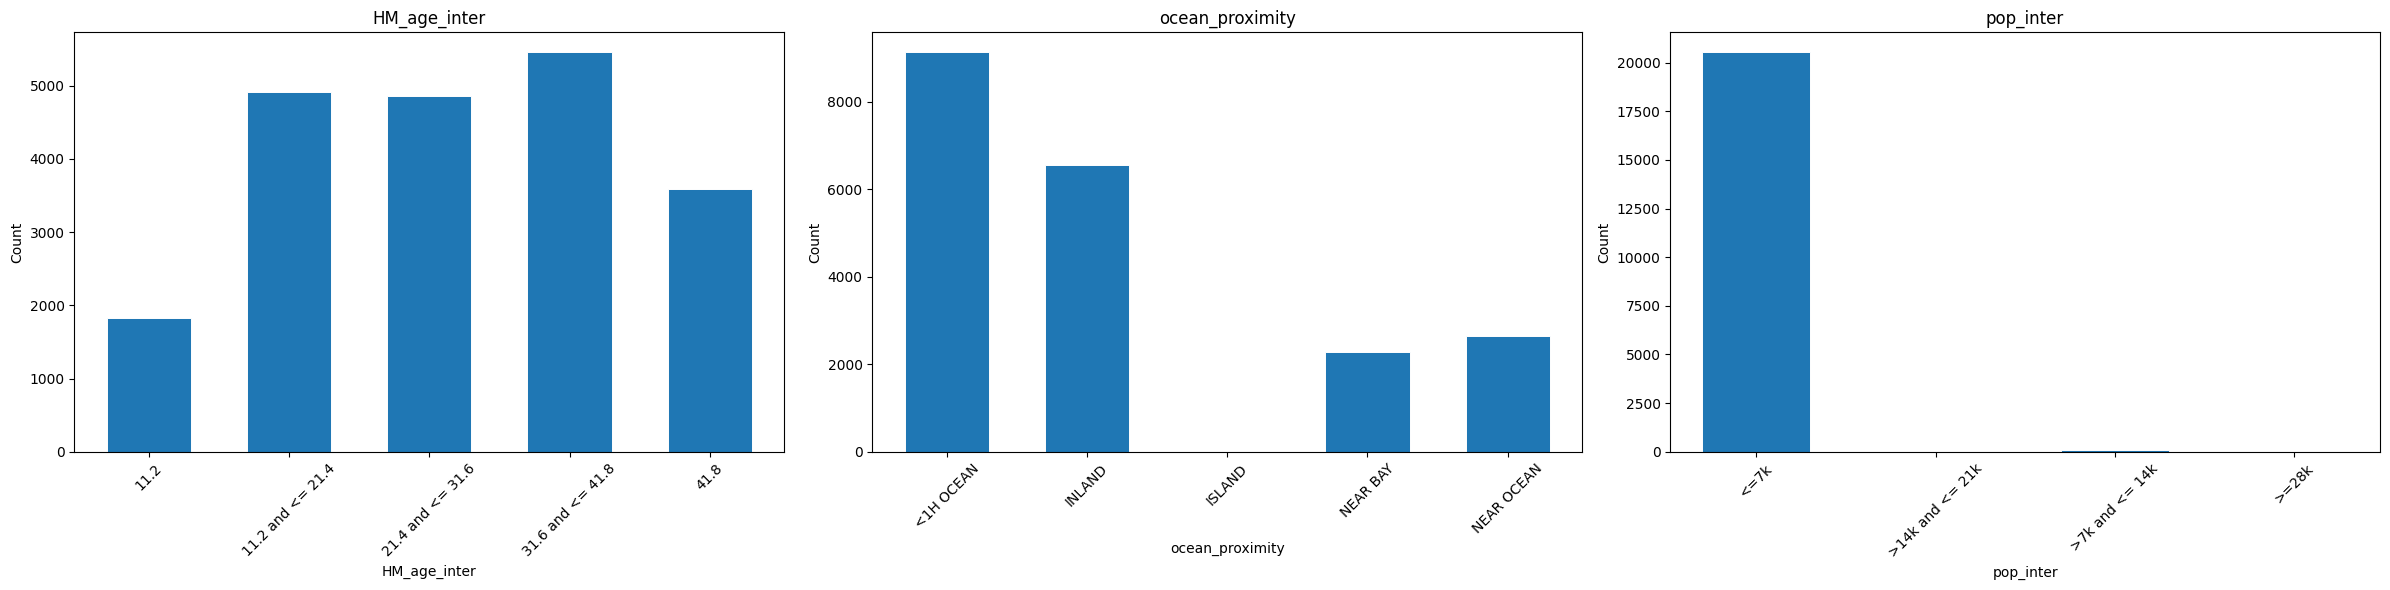

In [31]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

# Legendas em idades
hm_age_labels = ['11.2', '11.2 and <= 21.4', '21.4 and <= 31.6', '31.6 and <= 41.8', '41.8']

# Legendas para população
pop_labels = ['<=7k', '>7k and <= 14k', '>14k and <= 21k', '>21k and <= 28k', '>=28k']

for column, ax in zip(['HM_age_inter', 'ocean_proximity', 'pop_inter'], [ax1, ax2, ax3]):
    if column == 'HM_age_inter':
        x = data[column].value_counts().sort_index().index
        x = pd.Categorical(x, categories=hm_age_labels, ordered=True)
        x = x.rename_categories(hm_age_labels)
    elif column == 'pop_inter':
        x = data[column].astype(str).value_counts().sort_index().index
        x = pd.Categorical(x, categories=pop_labels, ordered=True)
    else:
        x = data[column].value_counts().sort_index().index

    y = data[column].value_counts().sort_index().values

    ax.bar(x, y, width=0.6, edgecolor="white", linewidth=0.7)

    # Rotacionando os eixos X
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Adicionando label para mostrar "COUNT"
    ax.set_xlabel(column)
    ax.set_ylabel("Count")

    # Títulos
    ax.set_title(column)

plt.tight_layout()
plt.show()


#### 3.2- Explorando a variavel median_house_value parte 1:
###### 1 - Maior variabilidade da informação da população entre 14k a 21k, isso tambem acontece em ocean proximity = ISLAND
###### 2 - Distribuição muito próximo de uniforme quando distribuido entre idades
###### 3 - Não há informação entre população = >21k e <=28k

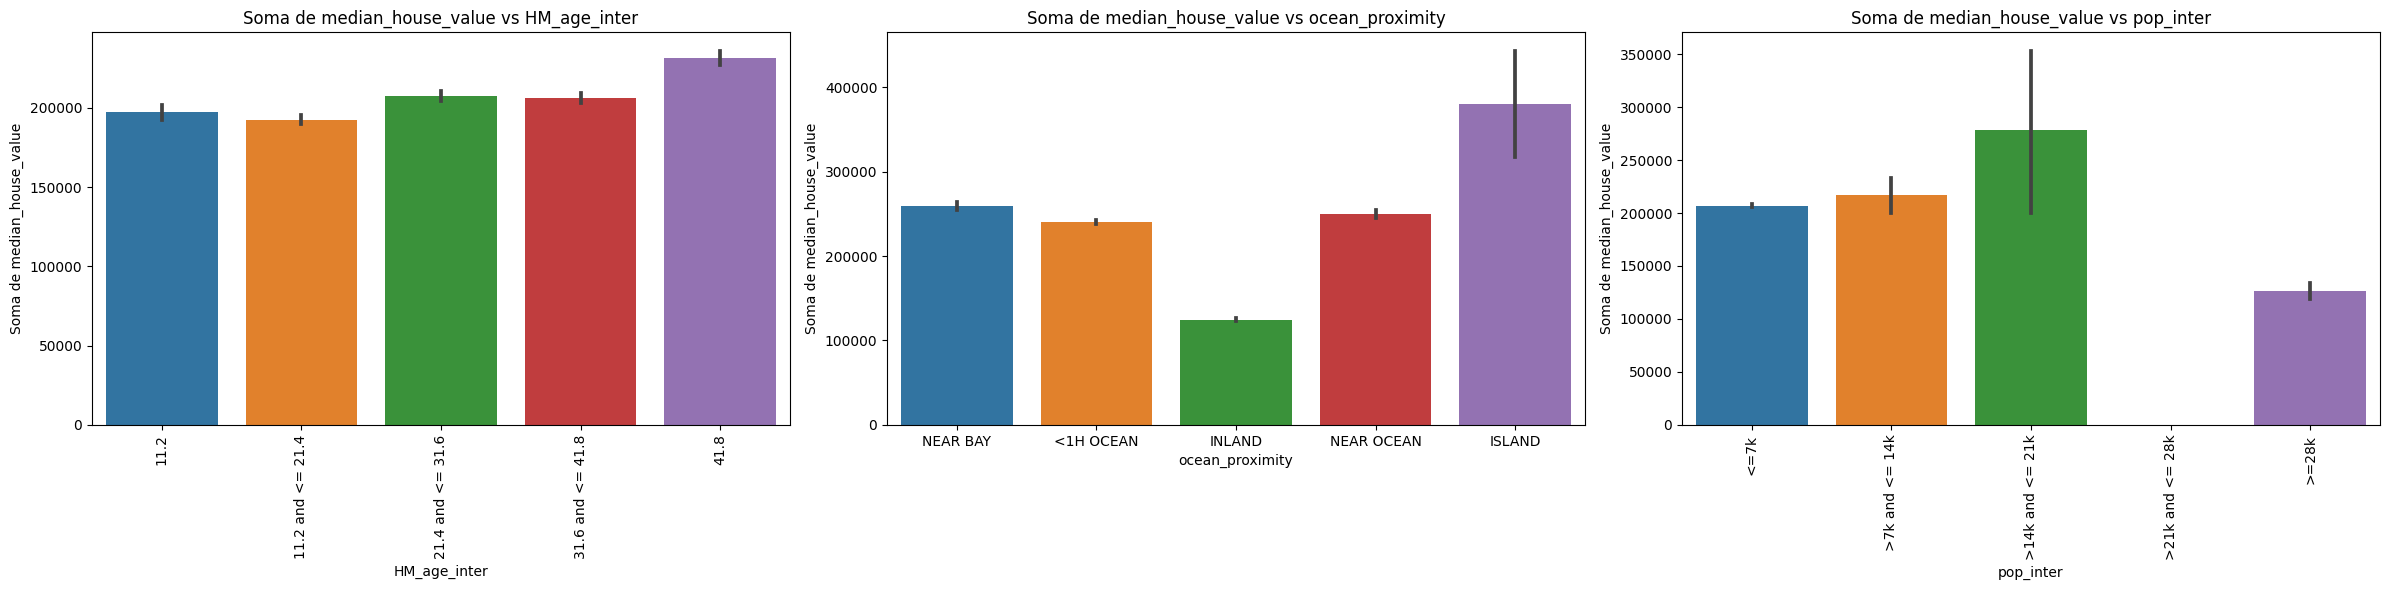

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))


# median_house_value vs HM_age_inter
ax1 = axes[0]
coluna_desc = 'median_house_value'

sns.barplot(x='HM_age_inter', y=coluna_desc, data=data, ax=ax1, order=hm_age_labels)
ax1.set_xlabel('HM_age_inter')
ax1.set_ylabel('Soma de ' + coluna_desc)
ax1.set_title('Soma de ' + coluna_desc + ' vs HM_age_inter')
ax1.set_xticklabels(hm_age_labels, rotation=90)

# median_house_value vs ocean_proximity
ax2 = axes[1]

sns.barplot(x='ocean_proximity', y=coluna_desc, data=data, ax=ax2)
ax2.set_xlabel('ocean_proximity')
ax2.set_ylabel('Soma de ' + coluna_desc)
ax2.set_title('Soma de ' + coluna_desc + ' vs ocean_proximity')

# median_house_value vs pop_inter
ax3 = axes[2]
sns.barplot(x='pop_inter', y=coluna_desc, data=data, ax=ax3, order=pop_labels)
ax3.set_xlabel('pop_inter')
ax3.set_ylabel('Soma de ' + coluna_desc)
ax3.set_title('Soma de ' + coluna_desc + ' vs pop_inter')
ax3.set_xticklabels(pop_labels, rotation=90)

plt.tight_layout()
plt.show()


#### 3.3 - Explorando variavel median_house_value parte 2:
###### 1 - Grande quantidade de Outliers quando ocean_proximity=INLAND
###### 2 - Os graficos não possuem uma distribuição simetrica, sendo que na maioria dos casos no 3 quartil temos uma boa concentração de dados
###### 3 - Para ocean_proximity=ISLAND, sua maior concentração da informação está entre o 1 e 2 quartil
###### 4 - Nas distribuições das idades vemos que quando a população é menor ou igual a 7k, temos uma maior variabilidade da informação, sendo que para ">28k" é minima

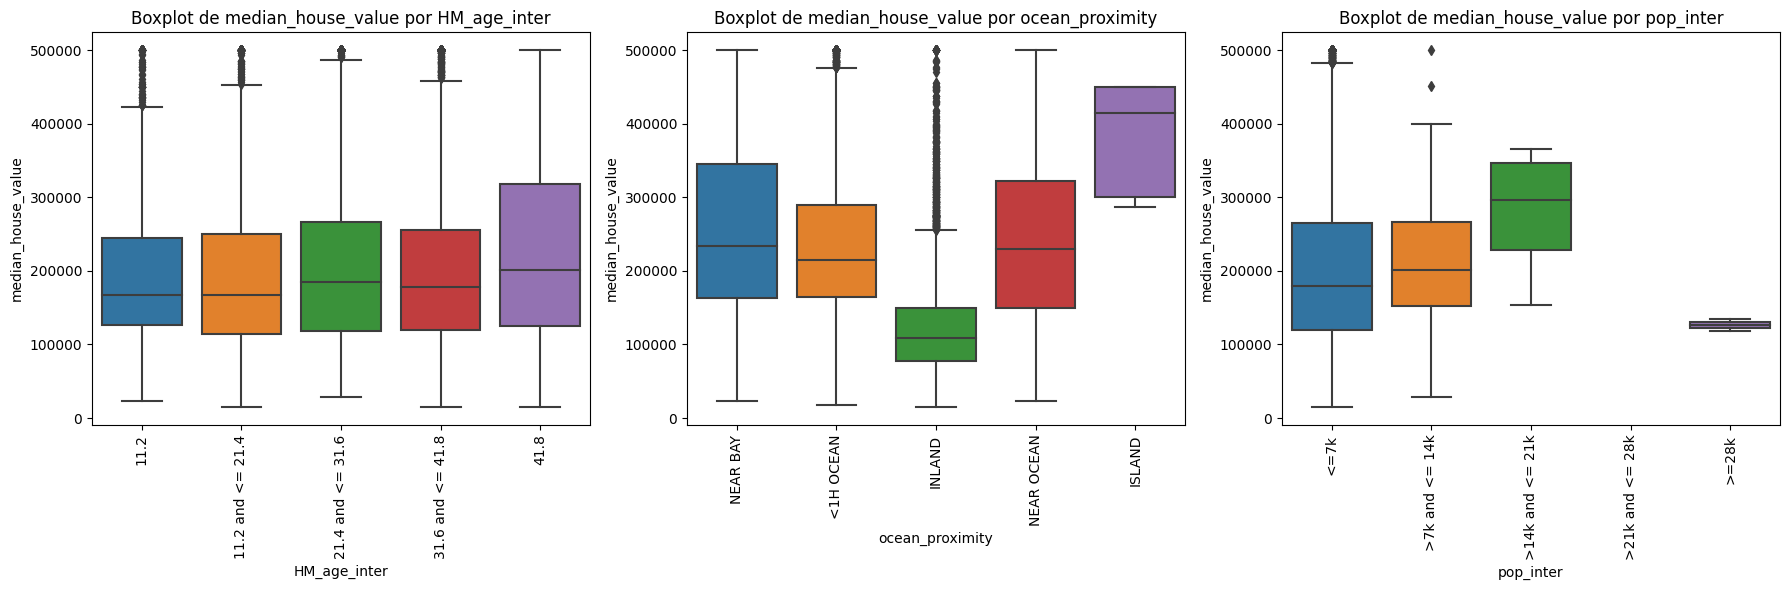

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# median_house_value vs HM_age_inter
ax1 = axes[0]
sns.boxplot(x='HM_age_inter', y=coluna_desc, data=data, order=hm_age_labels, ax=ax1)
ax1.set_xlabel('HM_age_inter')
ax1.set_ylabel(coluna_desc)
ax1.set_title('Boxplot de median_house_value por HM_age_inter')
plt.xticks(rotation=90)  

#  median_house_value vs ocean_proximity
ax2 = axes[1]
sns.boxplot(x='ocean_proximity', y=coluna_desc, data=data, ax=ax2)
ax2.set_xlabel('ocean_proximity')
ax2.set_ylabel(coluna_desc)
ax2.set_title('Boxplot de median_house_value por ocean_proximity')
plt.xticks(rotation=90)  

# median_house_value vs pop_inter
ax3 = axes[2]
sns.boxplot(x='pop_inter', y=coluna_desc, data=data, order=pop_labels, ax=ax3)
ax3.set_xlabel('pop_inter')
ax3.set_ylabel(coluna_desc)
ax3.set_title('Boxplot de median_house_value por pop_inter')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


#### 3.4 - Medindo impacto das variaveis  nas demais colunas
###### Vemos que temos 3 grupos de alto impacto : [latitude e longitude], [population,rooms,beedroms, households] e [median_house_value, median_income] onde há alto impacto entre as esses grupos
###### Há pouco nível de correlação entre os grupos citados acima

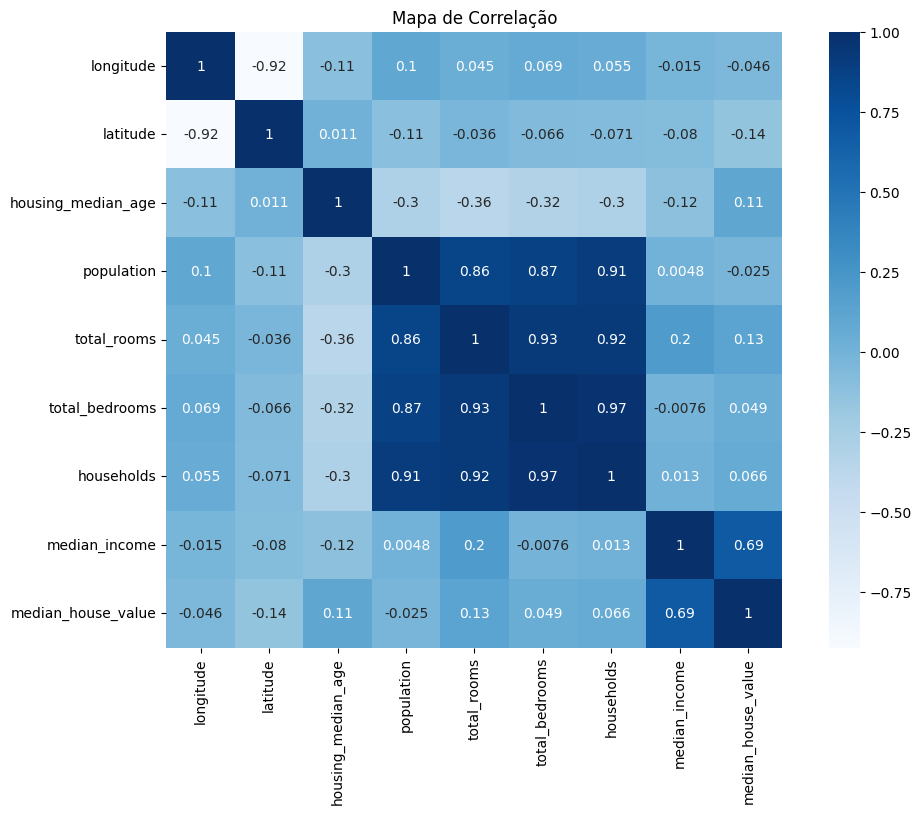

In [34]:
#Mapa de Correlação
variaveis = ['longitude','latitude','housing_median_age','population','total_rooms', 'total_bedrooms', 'households', 'median_income', 'median_house_value']
matrix = data[variaveis].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, cmap='Blues', square=True)

plt.title('Mapa de Correlação')
plt.show()

#### 3.5 - Resultados que chamam atenção durante a  exploração

###### 1- Grande quantidade de outliers sobre a variavel median_house_value
###### 2- Forte correlação da variavel median_house_value com a variavel median_income
###### 3- Grande variabilidade dos dados quando vemos as aberturas populacionais e de proximidade do oceano (ligado ao item 1)
###### 4- Por mais que a coluna ocean_proximity mostre, ela basicamente diz se estamos dentro do oceano ou estamos em Terra
###### 5- Podemos dizer que a grande maioria da população possui 7k de habitantes
###### 6- Lat e Long não aponta alta correlação com demais colunas, tendo pouquissimo impacto no modelo

### 4- Encoding e Features

In [35]:
#Criação de feature para saber se está em "terra" ou "está no oceano"
data['ocean_proximity_tipo'] =''
data.loc[data['ocean_proximity'] == 'NEAR BAY', 'ocean_proximity_tipo'] = 'EARTH'
data.loc[data['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity_tipo'] = 'OCEAN'
data.loc[data['ocean_proximity'] == 'INLAND', 'ocean_proximity_tipo'] = 'EARTH'
data.loc[data['ocean_proximity'] == 'NEAR OCEAN', 'ocean_proximity_tipo'] = 'OCEAN'
data.loc[data['ocean_proximity'] == 'ISLAND', 'ocean_proximity_tipo'] = 'EARTH'

#Feature mostrando que a população está abaixo de 7k
data.loc[data['population'] <= 7138.8, 'pop_inter'] = 'MENOR'
data.loc[data['population'] > 7138.8, 'pop_inter'] = 'MAIOR'

#Criação da feature para agrupamento das idades
data.loc[data['HM_age_inter'] =='11.2', 'HM_age_inter'] = 0
data.loc[data['HM_age_inter'] =='11.2 and <= 21.4', 'HM_age_inter'] = 1
data.loc[data['HM_age_inter'] =='21.4 and <= 31.6', 'HM_age_inter'] = 2
data.loc[data['HM_age_inter'] =='31.6 and <= 41.8', 'HM_age_inter'] = 3
data.loc[data['HM_age_inter'] =='41.8', 'HM_age_inter'] = 4




data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,pop_inter,HM_age_inter,ocean_proximity_tipo
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,MENOR,3,EARTH
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,MENOR,1,EARTH
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,MENOR,4,EARTH
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,MENOR,4,EARTH
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,MENOR,4,EARTH
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,MENOR,4,EARTH
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,MENOR,4,EARTH
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,MENOR,4,EARTH
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,MENOR,4,EARTH
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,MENOR,4,EARTH


In [36]:
#Aplicação do conceito de One Hot Encoding  para as colunas ocean_proximity,ocean_proximity_tipo e pop_inter
dict_ocean = {item:index for index, item in enumerate(data['ocean_proximity'].unique())}

dict_ocean_tipo = {item:index for index, item in enumerate(data['ocean_proximity_tipo'].unique())}

dict_pop_inter = {item:index for index, item in enumerate(data['pop_inter'].unique())}

data['ocean_proximity'] = data['ocean_proximity'].map(dict_ocean)
data['ocean_proximity_tipo'] = data['ocean_proximity_tipo'].map(dict_ocean_tipo)
data['pop_inter'] = data['pop_inter'].map(dict_pop_inter)


data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,pop_inter,HM_age_inter,ocean_proximity_tipo
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,3,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,4,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,4,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,4,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,4,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,4,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0,0,4,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,4,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0,0,4,0


### 5- Removendo Outliers

#### 5.1 - Usando o metodo Interquartil IQR

In [37]:
#calculos dos limites superiores e inferiores
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data_no_outliers = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

### 6 - Criando Bases de Treino e Teste (Modelo 80:20)

In [38]:
Y = data_no_outliers['median_house_value']
X = data_no_outliers.drop(['median_house_value','latitude','longitude',],axis=1)

In [39]:
#Criação das bases de treino e teste
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=42)

X_train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,pop_inter,HM_age_inter,ocean_proximity_tipo
10013,14.0,811.0,161.0,352.0,121.0,3.5938,2,0,1,0
7025,36.0,446.0,108.0,410.0,117.0,3.3942,1,0,3,1
12403,5.0,1664.0,444.0,907.0,374.0,2.7667,2,0,0,0
8091,33.0,1278.0,311.0,1157.0,320.0,3.5054,3,0,3,1
13779,21.0,3098.0,646.0,1351.0,614.0,2.5980,2,0,1,0


In [40]:
y_test.head()

10019    138800.0
19851     53500.0
6822     218300.0
16489    161100.0
16435    155000.0
Name: median_house_value, dtype: float64

### 7 - Deixando os numeros na mesma escala


In [41]:
#Deixando os valures numerios da base na mesma escala
colunas_numericas=['housing_median_age', 'total_rooms', 'total_bedrooms','population','households']
sc=StandardScaler()
X_train[colunas_numericas]=sc.fit_transform(X_train[colunas_numericas])
X_test[colunas_numericas]=sc.transform(X_test[colunas_numericas])

X_train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,pop_inter,HM_age_inter,ocean_proximity_tipo
10013,-1.272984,-1.225459,-1.296411,-1.407975,-1.443701,3.5938,2,0,1,0
7025,0.530622,-1.560856,-1.538201,-1.311680,-1.463210,3.3942,1,0,3,1
12403,-2.010822,-0.441642,-0.005342,-0.486535,-0.209751,2.7667,2,0,0,0
8091,0.284676,-0.796335,-0.612099,-0.071472,-0.473123,3.5054,3,0,3,1
13779,-0.699109,0.876053,0.916198,0.250617,0.960795,2.5980,2,0,1,0


### 8- Treinando o modelo e medindo o acerto (R²,MAE e RMSE)

In [42]:
# Objeto do modelo de regressao linear simples
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


# Cálculo de acerto atraves do R² Score ,MAE e  RMSE
r = pd.DataFrame({
    'Modelo': ['Linear Regression'],
    'R²_Score (%)': round(r2_score(y_test, y_pred)*100,2),
    'MAE': round(mean_absolute_error(y_test, y_pred),2),
    'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
})

#Mostrar resultados
print(r)


              Modelo  R²_Score (%)       MAE      RMSE
0  Linear Regression         59.98  44627.14  59529.65
